# Анализ бизнес-показателей сервиса Яндекс.Афиша <a name="0"></a>

Данное исследование проведено для отдела маркетинга сервиса по продаже билетов на развлекательные мероприятия "Яндекс.Афиша" на основе данных за период с июня 2017 по май 2018 года включительно. Цель исследования — оценить эффективность маркетинговых кампаний и дать рекомендации по оптимизации рекламного бюджета.

____
### Оглавление

#### [Часть 1. Первичное изучение полученных данных](#1)

   [1.1 Загрузка библиотек и файлов с данными](#1.1)  
   [1.2 Изучение основных параметров датафрейма](#1.2)  
   [1.3 Выводы: описание полученных данных](#1.3)  

#### [Часть 2. Подготовка данных к анализу](#2)

   [2.1 Замена типов данных](#2.1)  
   [2.2 Дополнительное изучение данных и проверка их на корректность](#2.2)  
   [2.3 Выводы](#2.3)  

#### [Часть 3. Рассчет основных метрик](#3)

   [3.1 Основные метрики по продукту](#3.1)  
   [3.2 Промежуточные выводы (метрики продукта)](#3.2)  
   [3.3 Основные метрики продаж](#3.3)  
   [3.4 Промежуточные выводы (метрики продаж)](#3.4)  
   [3.5 Основные метрики маркетинга](#3.5)  
   [3.6 Промежуточные выводы (метрики продаж)](#3.6)  
   [3.7 Дополнительные исследования](#3.7)  

#### [Часть 4. Итоговые выводы исследования](#4)
____

## Часть 1. Первичное изучение полученных данных <a name="1"></a>

### 1.1 Загрузка библиотек и файлов с данными <a name="1.1"></a>

In [1]:
# загружаем необходимые библиотеки для дальнейшей работы
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# загружаем файлы с данными
visits_data = pd.read_csv("/datasets/5_visits_log.csv")
orders_data = pd.read_csv("/datasets/5_orders_log.csv")
costs_data = pd.read_csv("/datasets/5_costs.csv")

### 1.2 Изучение основных параметров датафрейма <a name="1.2"></a>

In [3]:
# изучим данные в таблицах

# автоматизируем процесс с помощью функции
def df_info(data):
    display(data.head())
    print()
    display(data.info())
    print("\033[34m{} \033[0m{}".format("Количество дубликатов:", data.duplicated().sum()))
    print()

# подготовим словарь с названием таблиц для исследования
data_name = {
    "visits" : visits_data, 
    "orders" : orders_data, 
    "costs" : costs_data
}

# проведем первичное исследование данных
for key in data_name:
    print("\033[1m\033[34m~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("Общая информация: '{}'".format(key))
    df_info(data_name[key])

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Общая информация: 'visits'


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

Количество дубликатов: 0

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Общая информация: 'orders'


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

Количество дубликатов: 0

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Общая информация: 'costs'


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

Количество дубликатов: 0



In [4]:
# скорректируем названия столбцов
# с помощью цикла и созданного ранее словаря data_name

for key in data_name:
    columns = list(data_name[key].columns.str.lower())
    for i in range(0, len(columns) - 1):
        columns[i] = columns[i].replace(" ", "_")
        
    data_name[key].columns = columns

#  проверим результат на одной из таблиц
visits_data.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

### 1.3 Выводы: описание полученных данных <a name="1.3"></a>

Мы имеем данные о посещениях сайта сервиса Яндекс.Афиша, сделанных заказах и расходах на маркетинг за период с июня 2017 по май 2018. Информация хранится в трех таблицах.  
  
В таблице `visits_data` хранятся данные о посещениях пользователями сайта сервиса:  
* **`uid`** — уникальный идентификатор пользователя (тип данных `uint64`)  
* **`device`** — категория устройства пользователя (тип данных `object`)  
* **`start_ts`** — дата и время начала сессии (тип данных `object`)  
* **`end_ts`** — дата и время окончания сессии (тип данных `object`)  
* **`source_id`** — идентификатор рекламного источника, из которого пришел пользователь (тип данных `int64`)  
  
В таблице `orders_data` хранятся данные о сделанных заказах и полученной сервисом выручки:  
* **`uid`** — уникальный id пользователя, который сделал заказ (тип данных `uint64`)  
* **`buy_ts`** — дата и время заказа (тип данных `object`)  
* **`revenue`** — выручка Яндекс.Афиши с этого заказа (тип данных `float64`)  
  
В таблице `costs_data` хранится информация о маркетинговых затратах на каждый источник трафика по дням:  
* **`source_id`** — идентификатор рекламного источника (тип данных `int64`)  
* **`dt`** — дата (тип данных `object`)  
* **`costs`** — затраты на этот рекламный источник в этот день (тип данных `float64`)  
  
**Дубликатов и пропусков в данных не обнаружено**, были исправлены названия столбцов для удобства дальнейшей работы (приведены в нижний регистр, пробелы заменены на "_"), **некорректные типы данных** в столбцах с датами необходимо изенить на тип `datetime` для всех трех таблиц. 

## Часть 2. Подготовка данных к анализу <a name="2"></a>

### 2.1 Замена типов данных <a name="2.1"></a>

In [5]:
# скорректируем типы данных в столбцах с датами

# автоматизируем процесс с помощью функции
def correct_date(data):
    for column in list(data.columns):
        # задаем ключевые символы для поиска нужных столбцов
        for i in ["dt", "_ts"]:
            if i in column:
                data[column] = pd.to_datetime(data[column])

# применим функцию ко всем таблицам с помощью словаря "data_name"
for key in data_name:
    correct_date(data_name[key])
    # проверяем результат замены типов данных
    print("\033[34mИнформация по таблице '{}'\033[0m".format(key))
    display(data_name[key].info())

Информация по таблице 'visits'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


None

Информация по таблице 'orders'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


None

Информация по таблице 'costs'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


None

In [6]:
# добавим столбцы с данными о неделе, месяце и годе события в данных

# автоматизируем процесс с помощью функции
def date_part(data, column):
    data["date"] = data[column].dt.date
    data["week"] = data[column].dt.week
    data["month"] = data[column].dt.month
    data["year"] = data[column].dt.year

# создадим словарь с нудными парами "data-column"
date_column = ({
    "start_ts" : visits_data,
    "buy_ts" : orders_data,
    "dt" : costs_data
})

# добавим нужные столбцы с помощью цикла
for key in date_column:
    date_part(date_column[key], key)

# проверим результат на одной из таблиц
visits_data.head()

,device,end_ts,source_id,start_ts,uid,date,week,month,year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017


### 2.2 Дополнительное изучение данных и проверка их на корректность <a name="2.2"></a>

In [7]:
print("\033[1mДля таблицы 'visits_data'\033[0m",
      "Кол-во строк c некорректными данными начала сессии: {}"
      .format(visits_data.query("start_ts > end_ts")["uid"].count()),
      sep="\n")

print("Сессии с нулевой продолжительностью: {}%"
      # кол-во нулевых сессий умножаем на сто и делим на общее кол-во сессий (результат в процентах)
      .format(visits_data.query("start_ts == end_ts")["uid"].count() * 100 / visits_data["uid"].count()))

print()

print("\033[1mПроверим корректность периода, за который предоставлены данные в таблицах:\033[0m")
# используем цикл и словарь "date_column" для автоматизации процесса
for key in date_column:
    print("— по колонке '{}': c {} по {}"
          .format(key, date_column[key][key].dt.date.min(), date_column[key][key].dt.date.max()))

Для таблицы 'visits_data'
Кол-во строк c некорректными данными начала сессии: 2
Сессии с нулевой продолжительностью: 9.95937673900946%

Проверим корректность периода, за который предоставлены данные в таблицах:
— по колонке 'start_ts': c 2017-06-01 по 2018-05-31
— по колонке 'buy_ts': c 2017-06-01 по 2018-06-01
— по колонке 'dt': c 2017-06-01 по 2018-05-31


In [8]:
# зададим переменную, в которой будет храниться размер выручки, меньше которой дают 90% заказов
persentiles_revenu_90 = int(np.percentile(a=orders_data["revenue"], q=[90]).round())
persentiles_revenu_90

9

In [9]:
print("\033[1mДля таблицы 'orders_data'\033[0m", 
      "\033[4mОбщие статистические показатели:\033[0m", 
      orders_data["revenue"].describe(),
      
      # для рассчета в % умножаем количество нулевых заказов на 100 и делим на общее количество
      "\033[4mПроцент заказов с нулевой выручкой (%):\033[0m", 
      orders_data.query("revenue == 0")["revenue"].count() 
      * 100 
      / orders_data["revenue"].count(),
      
      # для рассчета в % умножаем количество заказов с выручкой более "persentiles_revenu_90" на 100
      # и делим на общее количество заказов
      "\033[4mПроцент заказов с выручкой выше, чем у 90% остальных заказов (%):\033[0m",
      orders_data.query("revenue > @persentiles_revenu_90")["revenue"].count() 
      * 100 
      / orders_data["revenue"].count(),
      
      sep="\n"
     )

Для таблицы 'orders_data'
Общие статистические показатели:
count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64
Процент заказов с нулевой выручкой (%):
0.10116036893781613
Процент заказов с выручкой выше, чем у 90% остальных заказов (%):
10.707130814241793


In [10]:
print("\033[1mДля таблицы 'costs_data'\033[0m", 
      "\033[4mОбщие статистические показатели:\033[0m", 
      costs_data["costs"].describe(),
      sep="\n"
     )

Для таблицы 'costs_data'
Общие статистические показатели:
count    2542.000000
mean      129.477427
std       156.296628
min         0.540000
25%        21.945000
50%        77.295000
75%       170.065000
max      1788.280000
Name: costs, dtype: float64


### 2.3 Выводы <a name="2.3"></a>

Для дальнейшей работы скорректировали типы данных в колонках с датами, добавили столбцы со значениями недели, месяца и года.  
  
Дополнительно изучили данные на корректность предоставленной в них информации по нескольким критериям:  
* *соответствие дат указанному периоду с июня 2017 по май 2018*. В таблице `oders_data` временной период включает также 1 июня 2018 года, это могло произойти в случае, если клиент делал заказ в полночь или по каким-то причинам закрыл заказ на следующий день после начала оформления. Это некритичное расхождение и может быть проигнорировано.
  
* *некорректные данные и сессии с нулевой продолжительностью.* В таблице `visits_data` 2 строки отображают некорректную хронологию действий пользователя: время начала сессии началось позже ее окончания. Это некритичное количество и его можно проигнорировать, однако, в дальнейшем необходимо отслеживать подобные данные и в случае увеличения процента таких записей — искать техническую проблему.  
  
* *исследование данных о выручке*. При изучении таблицы `oders_data` выявлены заказы с нулевой выручкой — 0.1% — это могут быть бесплатные мероприятия, скидки и акции для лояльных клиентов и тд. Так как процент таких заказов минимален, такие заказы не повлияют на общую картину. Самая высокая выручка за заказ — 2633 единицы — подобные данные на фоне остальных выглядят "выбросами" и влияют на среднее, однако, в случае массовой закупки или высокого процента комиссии на дорогой заказ такие данные выглядят реальными. Эти данные могут влиять на средний чек. **Интересно изучить дополнительно** поведение пользователей, которые делали заказы стоимостью выше, чем у 90% остальных (выручка выше 9 единиц — переменная `persentiles_revenu_90`).  
    
* *Данные о затратах на рекламу выглядят корректно*: нет нулевых значений, максимальные значения выглядят реалистично. 
  
**Важно обратить внимание на количество сессий с нулевой продолжительностью** — таких в датасете ~10% — необходимо изучить поведение пользователей на сайте и выявить причины. Это также необходимо учитывать в исследовании продукта: мы можем тратить маркетинговый бюджет на таких клиентов (при оплате рекламы за клик, например), но по каким-то причинам (долгая загрузка страницы, ошибки и др) клиент закрывает сессию, не успев ознакомиться с предложением. Удалять такие записи некорректно, так как это отразится на маркетинговых показателях.  
  
**Данные корректные для проведения дальнейшего исследования и решения поставленных задач.**

# Часть 3. Рассчет основных метрик <a name="3"></a>

### 3.1 Основные метрики по продукту <a name="3.1"></a>

Посещаемость сайта за период 'date'
Количество заходов (медиана): 921 уникальных посетителей 



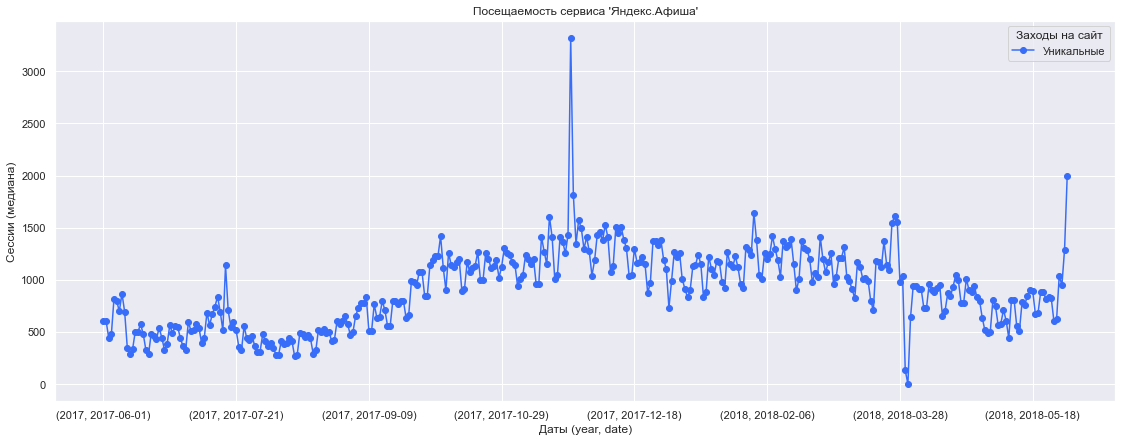

Посещаемость сайта за период 'week'
Количество заходов (медиана): 5740 уникальных посетителей 



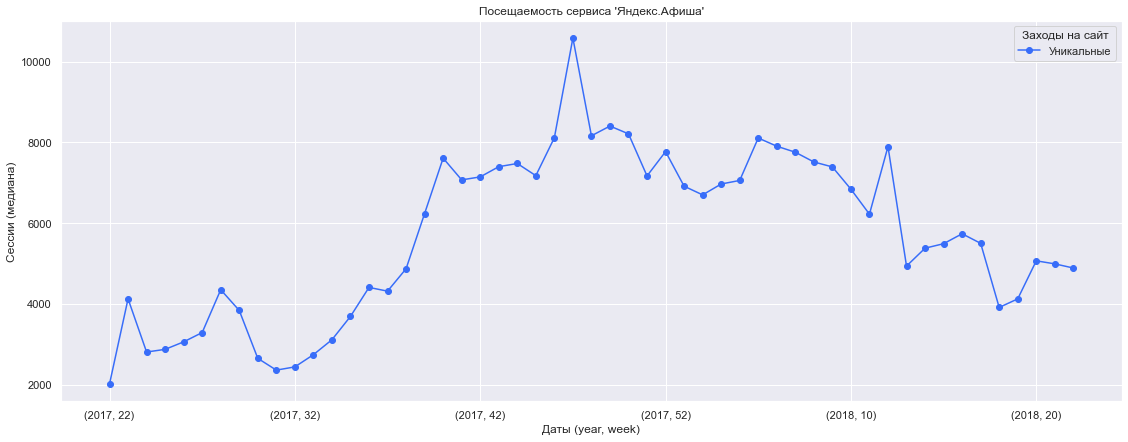

Посещаемость сайта за период 'month'
Количество заходов (медиана): 24240 уникальных посетителей 



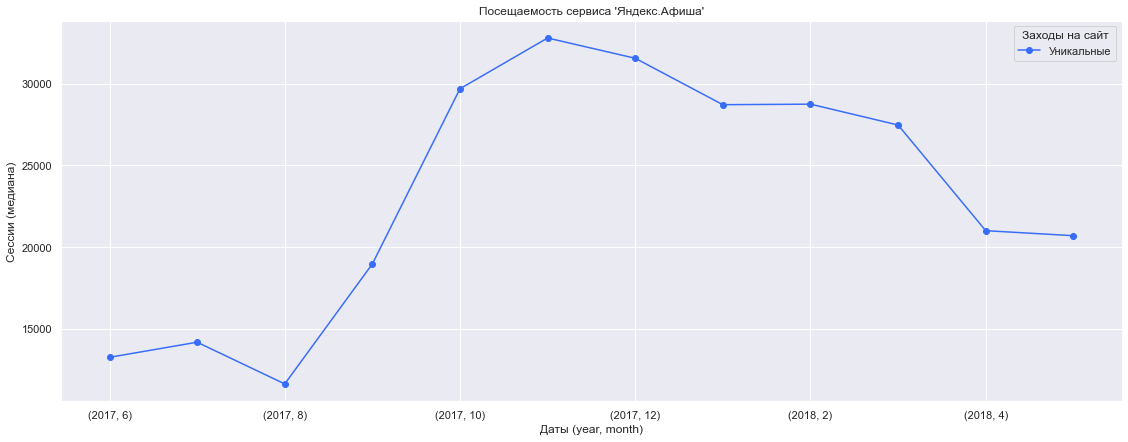

In [11]:
# узнаем cколько людей пользуются сервисом в день (DAU), неделю (WAU), месяц (MAU)

for x in ["date", "week", "month"]:
    print("\033[1m\033[34mПосещаемость сайта за период '{}'\033[0m".format(x))
    # рассчитаем медианное среднее посещений (уникальные пользователи)
    print("Количество заходов (медиана): {} уникальных посетителей"
          .format(int(visits_data.groupby(["year", x]).agg({"uid":"nunique"})["uid"].median().round())),
         "\n")
    
    # построим графики для визуализации посещаемости сервиса
    sns.set(rc={"figure.figsize":(19, 7)}, style="darkgrid", palette="rainbow")
    
    visits_data.groupby(["year", x]).agg({"uid":"nunique"}).plot(style="-o", grid=True)
    
    plt.title("Посещаемость сервиса 'Яндекс.Афиша'")
    plt.xlabel("Даты (year, {})".format(x))
    plt.ylabel("Сессии (медиана)")
    plt.legend(["Уникальные"], title="Заходы на сайт")
    plt.show()

In [12]:
# подсчитаем количество сессий в день на одного пользователя
session_per_user = visits_data.groupby(["date"]).agg({"uid":["count", "nunique"]})
session_per_user.columns = ["cnt_sessions", "cnt_uniq_users"]
session_per_user["session_per_user"] = session_per_user["cnt_sessions"] / session_per_user["cnt_uniq_users"]

print("\033[1m\033[34mКоличество сессий:\033[0m",
      "\n— {} (среднее) в день на одного пользователя".format(round(session_per_user["session_per_user"].mean(), 2)),
      "\n— {} (медиана) в день на одного пользователя".format(round(session_per_user["session_per_user"].median(), 2)))

# и вычислим среднюю продолжительность пользовательской сессии (ALS)
visits_data["session_duration_sec"] = (visits_data["end_ts"] - visits_data["start_ts"]).dt.seconds
als = visits_data["session_duration_sec"].mode()

print("\033[1m\033[34m\nСредняя продолжительность сессии (ALS):\033[0m \n{} секунд"
      .format(int(als.round(0))))

Количество сессий: 
— 1.08 (среднее) в день на одного пользователя 
— 1.08 (медиана) в день на одного пользователя

Средняя продолжительность сессии (ALS): 
60 секунд


Мы оценили пользовательскую активность для сервиса Яндекс.Афиша и подсчитали показатели (усредненные значения подсчитаны по медиане):  
* **DAU** (кол-во активных пользователей в день) ~921 уникальных сессий,   
* **WAU** (в неделю) ~5740 уникальных сессий,  
* **MAU** (в месяц) ~24240 уникальных сессий.   
  
Также **на графиках** с динамикой показателя МAU в разрезе 12 месяцев четко **видна сезонность использования сервиса**:    
* рост посещаемости начинается осенью и достигает пика в ноябре-декабре, что может быть связано с началом учебного года (сентябрь, школы, все вернулись в город и активнее организуют семейный  досуг, а в ноябре-декабре сезон покупки билетов на новогодние мероприятия для взрослых и детей, планирование каникул и тд.)  
* с декабря начинается спад посещаемости сайта и выравнивается в "плато" в январе-феврале-марте,  
* с марта наблюдается резкий спад активности и продолжается летом (возможно, сезон отпусков играет в этом роль, как и появление альтернативных способов провести досуг — на даче, прогулки в парках и тп.)  
  
**В связи с сезонностью рекомендуем рассматривать усредненные показатели по продажам с учетом этого фактора**.

### 3.3 Основные метрики продаж <a name="3.3"></a>

In [13]:
# узнаем, когда пользователи начинают покупать

# подготовим таблицу с данными о датах первой покупки и первой сессии на сайте для уникальных uid
first_buy = orders_data.groupby(["uid"]).agg({"buy_ts":"min"}).reset_index()
first_buy.columns = ["uid", "first_order"]
first_visit = visits_data.groupby(["uid"]).agg({"start_ts":"min"}).reset_index()
first_visit.columns = ["uid", "first_visit"]

# объединим таблицы
first_buy_data = first_buy.merge(first_visit, how="left")

# ПРОВЕРКА корректность данных в объединенной таблице first_buy_data
if (
    # кол-во uid в first_visit равно количеству уникальных uid в исходной таблице visits_data
    first_visit["uid"].count() == visits_data["uid"].nunique() and 
    # кол-во uid в first_buy равно количеству уникальных uid в исходной таблице oders_data
    first_buy["uid"].count() == orders_data["uid"].nunique() and 
    # кол-во строк в новой таблице после объединения first_buy и first_visit совпадает с исходником first_buy
    first_buy_data["uid"].count() == first_buy["uid"].count() and
    # в новой таблице first_buy_data нет пропусков в колонке "first_visit"
    first_buy_data[first_buy_data["first_visit"].isnull()]["uid"].count() == 0,
):
    print("Объединение таблиц прошло успешно:")
    display(first_buy_data.head())
else:
    print("Что-то пошло не так")
    print("Количество пустых значений в first_buy_data['first_visit']: ", 
          first_buy_data[first_buy_data["first_visit"].isnull()]["uid"].count())

Объединение таблиц прошло успешно:


,uid,first_order,first_visit
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


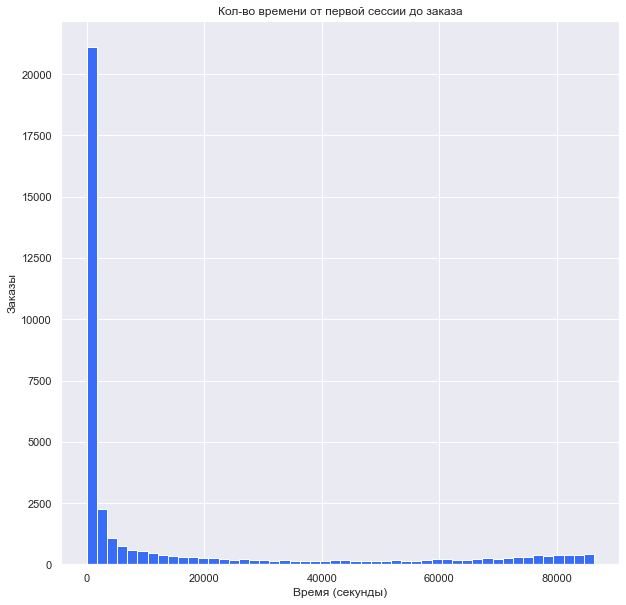

Количество заказов 'за 0 секунд'(в %):  6.754647756208416
Чаще всего от первой сессии до первого заказа проходит 16 минут (медианное значение)


In [14]:
# вычислим сколько времени проходит от первого посещения до первой покупки у уникальных пользователей
first_buy_data["time_to_first_order"] = (first_buy_data["first_order"] - first_buy_data["first_visit"]).dt.seconds

# изучим полученные данные с помощь гистограмы и определим метод подсчета среднего
first_buy_data["time_to_first_order"].hist(bins=50, figsize=(10, 10))
plt.title("Кол-во времени от первой сессии до заказа")
plt.xlabel("Время (секунды)")
plt.ylabel("Заказы")
plt.show()
print("Количество заказов 'за 0 секунд'(в %): ",
      first_buy_data.query("time_to_first_order < 1")["time_to_first_order"].count()
      / first_buy_data["time_to_first_order"].count()
      * 100
     )

# определим медианное время, которое проходит до первого заказа
time_to_first_order = first_buy_data["time_to_first_order"].median() / 60
print("\033[1m\033[34mЧаще всего от первой сессии до первого заказа проходит\033[0m {} минут (медианное значение)"
      .format(int(time_to_first_order)))

Усредненное количество заказов в период 'week' (медиана): 991


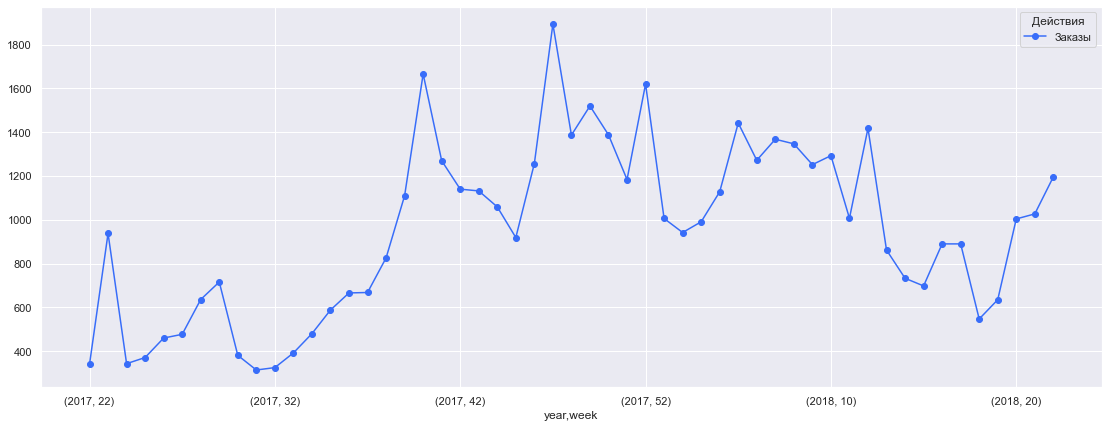

Усредненное количество заказов в период 'month' (медиана): 4346


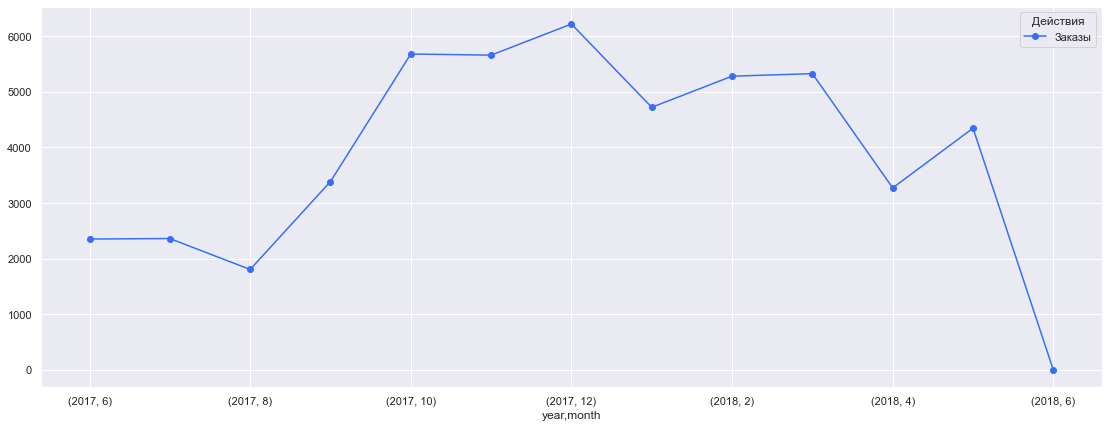

In [15]:
# узнаем сколько раз покупают за период
# возьмем отрезки в неделю и месяц
for x in ["week", "month"]:
    print("Усредненное количество заказов в период '{}' (медиана): {}"
          .format(x, int(orders_data.groupby(["year", x]).agg({"buy_ts":"count"}).median()["buy_ts"])))
    orders_data.groupby(["year", x]).agg({"buy_ts":"count"}).plot(style="-o", grid=True)
    plt.legend(["Заказы"], title="Действия")
    plt.show()

На графиках наблюдается явная сезонность, поэтому мы не можем взять за основу данные об усредненныом количестве заказов: это будет некорректно для сезона и в один сезон ожидания окажутся заниженными, а в другой — завышенными. Чтобы имень более корректное представление о количестве заказов за период (неделя и месяц) необходимо выделить сезоны и провести дополнительные рассчеты.

In [16]:
# выделим сезоны (Россия/Европа)
summer = range(6, 9)
spring = range(3, 6)
autumn = range(9, 12)
# winter — остальные месяцы

# напишем функцию для приваивания сезона по месяцу
def seasons(data):
    month = data["month"]
    if month in summer:
        return 3 # лето
    elif month in spring:
        return 2 # весна
    elif month in autumn:
        return 4 # осень
    else:
        return 1 # зима
        
# применим функцию и укажем сезон в отдельном столбце season
orders_data["season"] = orders_data.apply(seasons, axis=1)

In [17]:
# узнаем сколько раз покупают в день и месяц в зависимости от сезона
print("\033[1m\033[34mУсредненное количество заказов (медиана):\033[0m")
for i in range(1, 5):
    print("— для '{}' сезона: ".format(i),
          "{} в неделю и {} в месяц"
          .format(int(orders_data.query("season == @i").groupby(["week"]).agg({"buy_ts":"count"}).median()), 
                  int(orders_data.query("season == @i").groupby(["month"]).agg({"buy_ts":"count"}).median())))

Усредненное количество заказов (медиана):
— для '1' сезона:  1228 в неделю и 5281 в месяц
— для '2' сезона:  890 в неделю и 4346 в месяц
— для '3' сезона:  386 в неделю и 2355 в месяц
— для '4' сезона:  1084 в неделю и 5659 в месяц


In [18]:
# расчитаем средний чек с учетом времени жизни (когорты)
# шаг 1: выделим когорты по дате первой покупки
orders = (orders_data[["buy_ts", "revenue", "uid"]]
          .join(first_buy_data[["uid", "first_order"]].set_index("uid"), on="uid")
)
orders["first_order_month"] = orders["first_order"].astype("datetime64[M]")
orders["order_month"] = orders["buy_ts"].astype("datetime64[M]")

orders_cohort = (orders
                 .groupby(["first_order_month", "order_month"])
                 .agg({"revenue":"sum", "uid":"nunique", "buy_ts":"count"})
                 .reset_index()
)

orders_cohort.columns = ["first_order_month", "order_month", "sum_revenue", "n_uid", "cnt_orders"]

In [19]:
# шаг 2: подсчитаем средний чек и округлим до одного знака

# рассчет для среднего чека ОДНОГО ПОКУПАТЕЛЯ
orders_cohort["revenue_per_user"] = round((orders_cohort["sum_revenue"] / orders_cohort["n_uid"]), 1)
# и для ОДНОГО ЗАКАЗА
orders_cohort["revenue_per_order"] = round((orders_cohort["sum_revenue"] / orders_cohort["cnt_orders"]), 1)

In [20]:
# шаг 3: сфортируем lifetime для когорт с шагом в 1 месяц
orders_cohort["lifetime_cohort"] = (
    (orders_cohort["order_month"] - orders_cohort["first_order_month"]) 
    / np.timedelta64(1, "M")
)

# определим порядковый месяц совершения покупки относительно месяца первой покупки
orders_cohort["lifetime_cohort"] = orders_cohort["lifetime_cohort"].round().astype("int")

Text(0.5, 57.5, 'Кол-во месяцев с первой покупки')

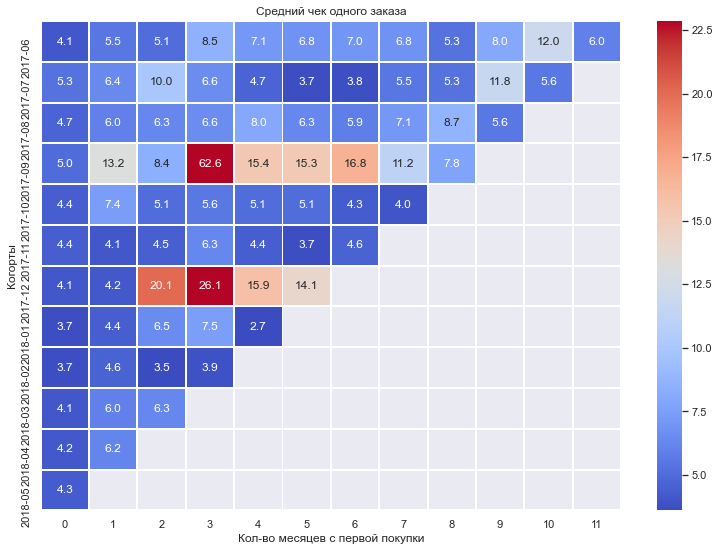

In [21]:
# шаг 4: построим сводную таблицу изменения среднего чека ОДНОГО ЗАКАЗА для когорт относительно lifetime
orders_cohort["cohort_date"] = orders_cohort["first_order_month"].apply(lambda x: x.strftime("%Y-%m"))

avg_check_one_order = (orders_cohort
                       .query("cohort_date != '2018-06'")
                       .pivot_table(index="cohort_date", 
                                    columns="lifetime_cohort", 
                                    values="revenue_per_order", 
                                    aggfunc="mean")
                       .reset_index()
)

avg_check_one_order = avg_check_one_order.set_index("cohort_date")

# визуализируем данные на тепловой карте
plt.figure(figsize=(13, 9))
plt.title("Средний чек одного заказа")
sns.heatmap(avg_check_one_order, robust=True, cmap="coolwarm", 
            annot=True, fmt=".1f", linewidths=1, linecolor="white")
plt.ylabel("Когорты")
plt.xlabel("Кол-во месяцев с первой покупки")

In [22]:
# дополнительно вычислим средний чек (ОДНОГО ЗАКАЗА) с учетом сезона
for_one_order = orders_data.groupby(["season"]).agg({"buy_ts":"count", "revenue":"sum"})
for_one_order["revenue_for_one_order"] = for_one_order["revenue"] / for_one_order["buy_ts"]
for_one_order

,buy_ts,revenue,revenue_for_one_order
season,,,
1,16220,81366.27,5.016416
2,12945,66428.63,5.131605
3,6525,30859.16,4.729373
4,14725,73403.14,4.984933


Text(0.5, 57.5, 'Кол-во месяцев с первой покупки')

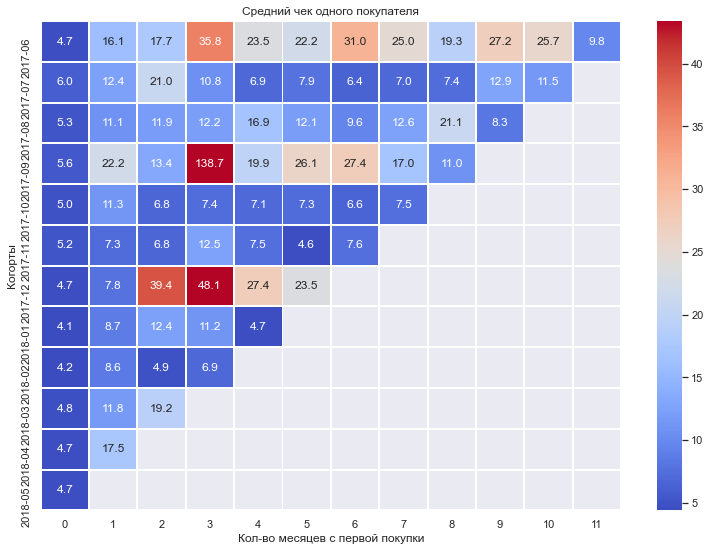

In [23]:
# шаг 5: построим сводную таблицу изменения среднего чека ОДНОГО ПОКУПАТЕЛЯ для когорт относительно lifetime
avg_check_one_customer = (orders_cohort
                       .query("cohort_date != '2018-06'")
                       .pivot_table(index="cohort_date", 
                                    columns="lifetime_cohort", 
                                    values="revenue_per_user", 
                                    aggfunc="mean")
                       .reset_index()
)

avg_check_one_customer = avg_check_one_customer.set_index("cohort_date")

# визуализируем данные на тепловой карте
plt.figure(figsize=(13, 9))
plt.title("Средний чек одного покупателя")
sns.heatmap(avg_check_one_customer, robust=True, cmap="coolwarm", 
            annot=True, fmt=".1f", linewidths=1, linecolor="white")
plt.ylabel("Когорты")
plt.xlabel("Кол-во месяцев с первой покупки")

Рассчитаем показатель LTV — «пожизненная» ценность клиента. Для расчета LTV необходимо знать прибыль и маржинальность для сервиса. В нашем случае маржинальность не указана отдельно, поэтому будем считать, что маржинальность уже учтена в данных колонки `revenue` (либо равна 1).  
  
Расчет LTV проведем по таблице `avg_check_one_customer`, где уже сформированы когорты по дате первой покупки, определен lifetime для когорт и рассчитан средний чек на одного уникального пользователя по колонке `revenue_per_user`.  

Text(0.5, 57.5, 'Возраст (age) когорты')

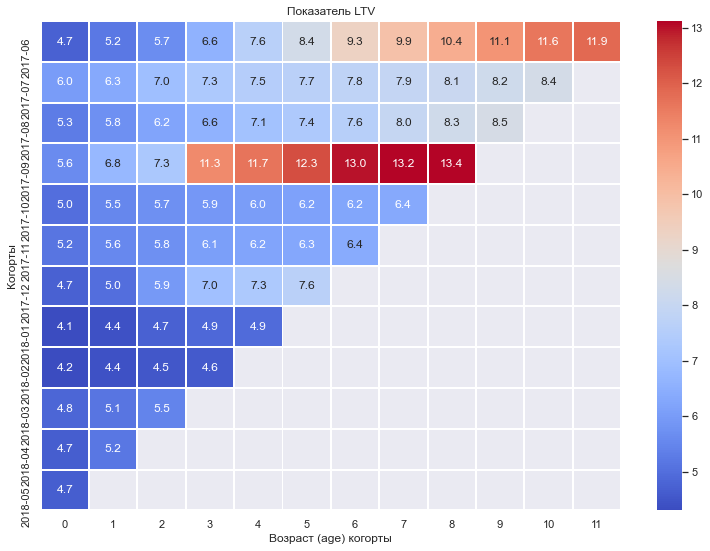

In [24]:
# рассчитаем LTV

# шаг 1: посчитаем количество новых покупателей (n_buyers) за каждый месяц
cohort_sizes = (orders
                .query("first_order_month < '2018-06'")
                .groupby("first_order_month")
                .agg({"uid": "nunique"})
                .reset_index()
               )

cohort_sizes.columns = ["first_order_month", "n_buyers"]

# шаг 2: cгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку
cohorts = orders.groupby(["first_order_month","order_month"]).agg({"revenue": "sum"}).reset_index()

# шаг 3: добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц
report = pd.merge(cohort_sizes, cohorts, on="first_order_month")

# шаг 4: дополнительные рассчеты 
# т.к. данных о маржинальности нет, берем ее за единицу
margin_rate = 1
report["gp"] = report["revenue"] * margin_rate
report["age"] = (report["order_month"] - report["first_order_month"]) / np.timedelta64(1, "M")
report["age"] = report["age"].round().astype("int")

# шаг 5: найдём LTV для когорт
report["ltv"] = report["gp"] / report["n_buyers"]

output = report.pivot_table(
        index="first_order_month", 
        columns="age", 
        values="ltv", 
        aggfunc="mean").round(2).cumsum(axis = 1)

# визуализируем данные на тепловой карте
plt.figure(figsize=(13, 9))
plt.title("Показатель LTV")
x = pd.DataFrame({'month':output.index})
x = x["month"].apply(lambda x: x.strftime("%Y-%m")).to_list()
sns.heatmap(output, robust=True, cmap="coolwarm", yticklabels=x,
            annot=True, fmt=".1f", linewidths=1, linecolor="white")
plt.ylabel("Когорты")
plt.xlabel("Возраст (age) когорты")

### 3.4 Промежуточные выводы (метрики продаж) <a name="3.4"></a>

При изучении поведения покупателей на сайте на основе данных о сделанных заказах и первых заходах на сайт для каждого пользователя, обнаружили, что ~6.7% пользователей сделали заказ "за 0 секунд" — это выглядит подозрительно и может быт техническим сбоем при сборе метрики о начале и завершении сессии на сайте.  **В среднем (медиана) между первой сессией и заказом проходит  ~16 минут**.  
  
Все заказы были сделаны в рамках суток относительного первого посещения сервиса — **если новый посетитель не сделал первую покупку в первые часы (max до 12 часов), то скорее всего он не станет покупателем**.  
  
Далее изучили усредненное количество сделанных заказов за неделю и месяц на протяжении 12 месяцев. Графики динамики количества заказов подтвердили сезонность покупок, поэтому **при анализе эффективности и планировании метрик, рекомендуем использовать усредненные значения в зависимости от сезона**. За период июнь 2017/май 2018 усредненное количество заказов составило:  
  
— зимой 1228 заказа  в неделю и 5281 в месяц,  
— весной 890 заказов в неделю и 4346 в месяц,  
— летом  386 в неделю и 2355 в месяц,  
— осенью 1084 заказов в неделю и 5659 в месяц.  
  
Для оценки среднего чека мы провели когортный анализ, где за когорту взяли уникальных пользователей, сделавших заказ в один из месяцев, а также учли lifetime, чтобы проследить динамику изменения среднего чека для когорты. Средний чек рассчитан в двух вариантах:  
  
* **средний чек одного заказа** чаще всего выше в последующие месяцы относительно первого, менее подвержен сезонности и может сильно отличаться для разных когорт, несмотря на то, что все когорты начинают с покупок в среднем  до от 4 до 5 единиц за заказ. **Наиболее привлекательные показатели у когорт за сентябрь 2017 и декабрь 2017** — пользователи пришли впервые в те месяцы, в которые стабильно наблюдается рост посещаемости и продаж (интересно понять, как это влияет на желание тратить стабильно больше со временем, они больше удовлетворены возможностям сервиса, возможно, стоит обратить внимание на популярные события этого периода и подробнее изучить, чем эти пользователи отличаются от остальных)
* **средний чек одного покупателя** помог выявить еще одну интересную когорту — июнь 2017 — по среднему чеку за заказ она ничем не отличалась от большинства, однако, именно в этой когорте мы наблюдаем отдельных покупателей — лояльных постоянных клиентов, которые в целом тратят больше и заказывают чаще, относительно других участников когорты, потенциально, похожая когорта может получиться из марта и апреля 2018, но там пока слишком мало данных для выводов — за ними можно понаблюдать в дальнейшем. **Более детальное изучение когорты июня 2017 может помочь выявить интересы и предпочтения лояльного покупателя.**  
  
LTV отражает "пожизненную ценность" клиента и дает понимание об итоговой суммы денег, которую клиент приносит в среднем со всех своих покупок. С "возрастом" выручка по когортам в основном прирастает, но крайне медленно. **Наибольшую выручку принесли когорты июнь 2017 и сентябрь 2017.**

### 3.5 Основные метрики маркетинга <a name="3.5"></a>

Всего потратили на маркетинг за весь период: 329131.62 

Траты с разбивкой по источникам:


,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


Средние затраты в месяц: 27427.63


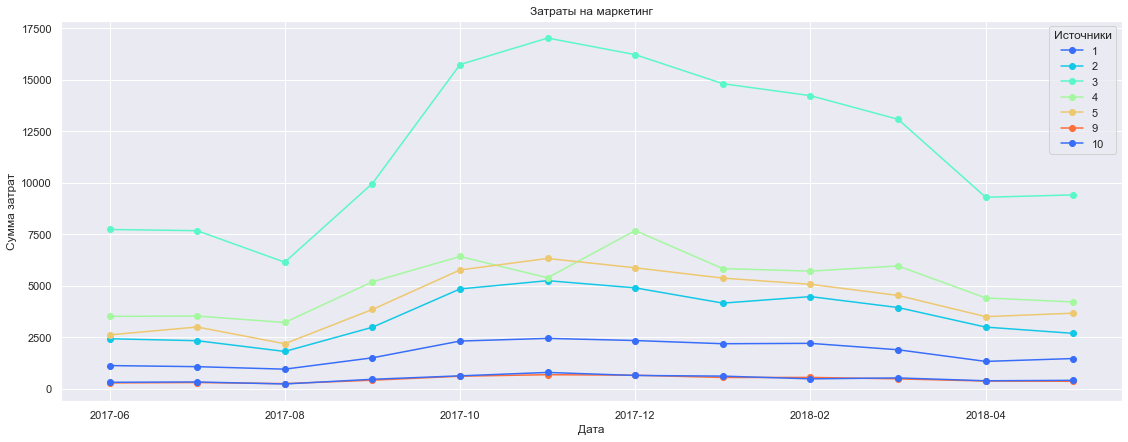

In [25]:
# узнаем сколько денег потратили на маркетинг: всего
print("\033[1m\033[34mВсего потратили на маркетинг за весь период:\033[0m", costs_data["costs"].sum(), "\n")

# на каждый источник
print("\033[1m\033[34mТраты с разбивкой по источникам:\033[0m")
display(costs_data.groupby(["source_id"]).agg({"costs":"sum"}))

# по времени
print("\033[1m\033[34mСредние затраты в месяц:\033[0m {}"
      .format(costs_data.groupby(["year", "month"]).agg({"costs":"sum"})["costs"].mean().round(2)))

# визуализируем маркетинговые затраты по времени с учетом источника
costs_data["cohort_date"] = costs_data["date"].apply(lambda x: x.strftime("%Y-%m"))
costs_data.pivot_table(index="cohort_date", columns="source_id", values="costs", aggfunc="sum").plot(style="-o")
plt.title("Затраты на маркетинг")
plt.xlabel("Дата")
plt.ylabel("Сумма затрат")
plt.legend(title="Источники")
plt.show()

In [26]:
# рассчитаем показатель CAC и узнаем сколько стоило привлечение одного покупателя из каждого источника

# шаг 1: сгруппируем costs по месяцу и источнику трафика и вычислим сумму затрат
costs_per_source = costs_data.groupby(["cohort_date", "source_id"]).agg({"costs":"sum"}).reset_index()

# шаг 2: выявим через какие источники впервые пришли на сайт сервиса уникальные посетители
first_source_users = visits_data.sort_values(by="start_ts").groupby(["uid"]).first().reset_index()
# сформируем список id уникальных клиентов
id_clients_list = list(first_buy_data["uid"])
# сделаем срез таблицы first_source и сохраним только данные о клиентах (совершили покупку)
first_source_clients = first_source_users.query("uid in @id_clients_list").reset_index()

# проверка
if first_source_clients["uid"].count() == first_buy_data["uid"].nunique():
    print("Шаг 2 успешно реализован")
else:
    print("Что-то пошло не так")

Шаг 2 успешно реализован


In [27]:
# шаг 3: группируем таблицу дате первого заказа пользователя и маркетиговому источнику
# и вычислим количество уникальных пользователей, привлеченных каждым источником
first_source_clients["cohort_date"] = first_source_clients["date"].apply(lambda x: x.strftime("%Y-%m"))
cac_per_source = first_source_clients.groupby(["cohort_date", "source_id"]).agg({"uid":"nunique"}).reset_index()

In [28]:
# шаг 4: соединим таблицу с данными по затратам на маркетинг для каждого источника
cac_per_source = cac_per_source.merge(costs_per_source, on=["cohort_date", "source_id"], how="left")
cac_per_source = cac_per_source.dropna()

Количество строк в таблице `cac_per_source` — 85, а в таблице `costs_per_source` — 84: для ресурса 7 в когорте "2017-08" нет данных о затратах на маркетинг, при этом сумма затрат в сводной таблице совпадает с суммой затрат исходной таблицы `costs_data`. Так как в данной когорте числится всего один клиент (uid "11377414203346034748"), мы сделаем допущение и не будем учитывать данную строку в дальнейших расчетах.

In [29]:
# шаг 5: вычислим показатель CAC для каждого источника и округлим до 2 знаков после запятой
cac_per_source["cac"] = (cac_per_source["costs"] / cac_per_source["uid"]).round(2)

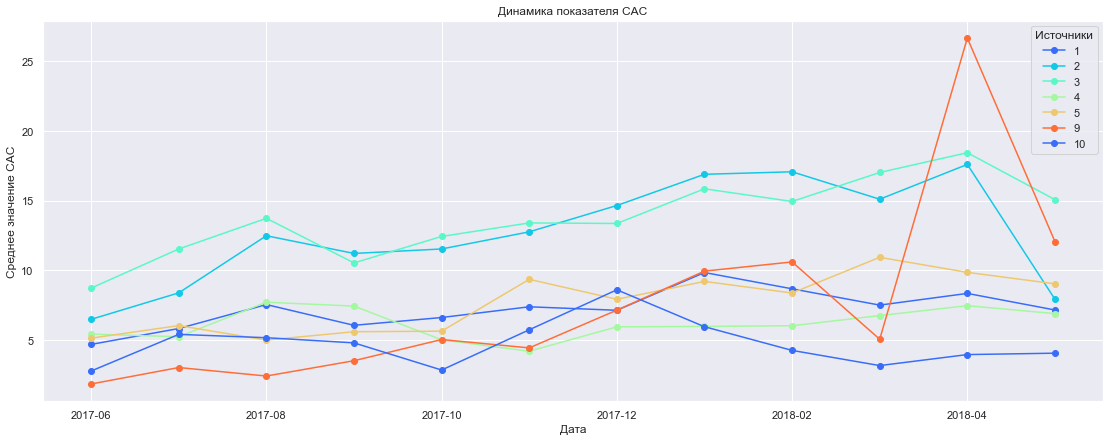

In [30]:
# шаг 6: визуализируем колебания показатели CAC по источникам за каждый месяц
cac_per_source.pivot_table(index="cohort_date", columns="source_id", values="cac", aggfunc="mean").plot(style="-o")
plt.title("Динамика показателя CAC")
plt.xlabel("Дата")
plt.ylabel("Среднее значение CAC")
plt.legend(title="Источники")
plt.show()

In [31]:
# вычислим средние и медианные показатели САС для каждого источника
cac_per_source_mean = cac_per_source.groupby(["source_id"]).agg({"cac":["mean", "median"]}).reset_index()
cac_per_source_mean.columns = ["source_id", "cac_mean", "cac_median"]
print("\033[1m\033[34mСреднее значение параметра CAC:\033[0m")
cac_per_source_mean.set_index("source_id")

Среднее значение параметра CAC:


,cac_mean,cac_median
source_id,,
1,7.235833,7.275
2,12.682500,12.630
3,13.761667,13.575
4,6.178333,6.005
5,7.678333,8.155
9,7.651667,5.050
10,4.730833,4.530


Text(0.5, 57.5, 'Источники трафика')

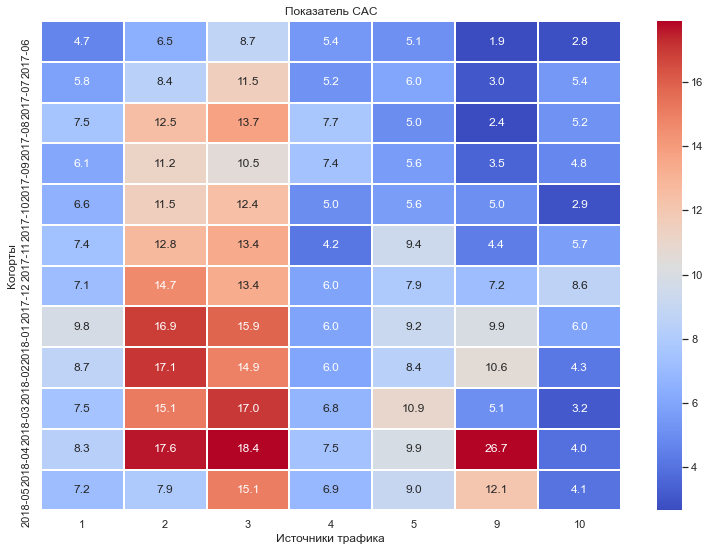

In [32]:
# визуализируем показатель САС на тепловой карте по когортам и источникам
cac_per_source_pivot = cac_per_source.pivot_table(index="cohort_date", 
                                                  columns="source_id", 
                                                  values="cac", 
                                                  aggfunc="mean")

# визуализируем данные на тепловой карте
plt.figure(figsize=(13, 9))
plt.title("Показатель CAC")
sns.heatmap(cac_per_source_pivot, robust=True, cmap="coolwarm",
            annot=True, fmt=".1f", linewidths=1, linecolor="white")
plt.ylabel("Когорты")
plt.xlabel("Источники трафика")

Проверим окупаемость маркетинговых вложений, сравнив показатели LTV и CAC для когорт со сроком жизни не менее 6 месяцев (по состоянию за 6 месяц).  
  
Чтобы корректнее подсчитать показатель LTV для когорт, сравнить результаты и сделать выводы, возьмем данные за 6 месяцев жизни `lifetime`. Для этого включим те когорты, срок жизни, которых не менее полугода и сделаем срез данных с условиями `lifetime_cohort < 6` (6 месяцев). Показатель CAC возьмем из предыдущих расчетов, суммировав затраты на разные источники.  

In [33]:
# узнаем насколько окупились затраты на маркетинг за 6 месяцев:

# выделим когорты со сроком жизни 6 месяцев и LTV по ним
ltv_six_month = output[~output[5].isnull()][5].reset_index()
ltv_six_month["cohort_date"] = ltv_six_month["first_order_month"].apply(lambda x: x.strftime("%Y-%m"))
# подсчитаем затраты на маркетинг за 6 месяцев по когортам
cac_six_month = cac_per_source_pivot.cumsum(axis=1)[10].reset_index()
payback_six_month = ltv_six_month[["cohort_date", 5]].merge(cac_six_month, on="cohort_date", how="left")
payback_six_month.columns = ["cohort_date", "ltv", "cac"]
# сравним показатели
payback_six_month

,cohort_date,ltv,cac
0,2017-06,8.36,35.11
1,2017-07,7.67,45.48
2,2017-08,7.37,54.09
3,2017-09,12.31,49.18
4,2017-10,6.16,49.15
5,2017-11,6.27,57.31
6,2017-12,7.65,64.81


Сравнив показатели LTV и СAС, мы видим, что ни одна из когорт не окупилась за полгода.

In [34]:
# рассчитаем ROI (в нашем случае — ROMI) и узнаем 
# сколько месяцев нужно каждой когорте, чтобы окупить маркетинговые затраты

# шаг 1: посчитаем CAC каждой когорты

# найдём суммарные расходы за каждый месяц
monthly_costs = costs_data.groupby(["cohort_date"]).agg({"costs":"sum"})

# добавим данные о расходах в отчёт
report["cohort_date"] = report["first_order_month"].dt.strftime("%Y-%m")
report_new = pd.merge(report, monthly_costs, on="cohort_date")

# посчитаем CAC
report_new["cac"] = report_new["costs"] / report_new["n_buyers"]

Text(0.5, 57.5, 'Lifetime когорт (шаг — 1 мес)')

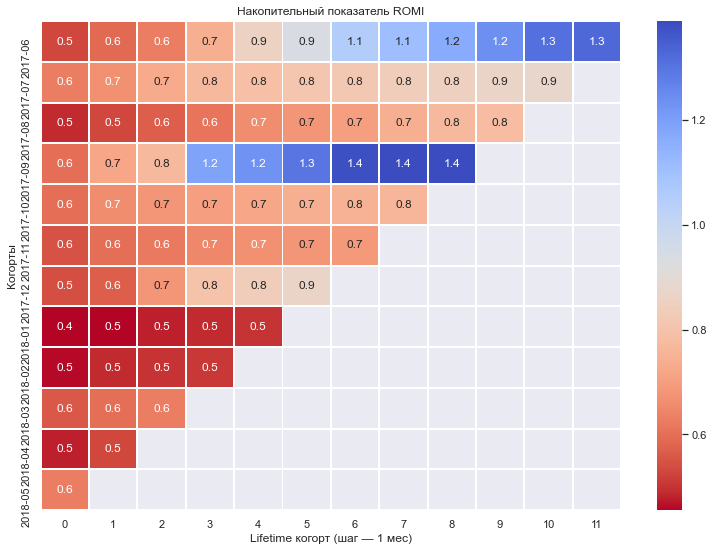

In [35]:
# шаг 2: рассчитаем накопительный ROMI: поделим LTV на CAC
report_new["romi"] = report_new["ltv"] / report_new["cac"]
output_new = report_new.pivot_table(
        index="cohort_date", 
        columns="age", 
        values="romi", 
        aggfunc="mean")

# визуализируем данные на тепловой карте
plt.figure(figsize=(13, 9))
plt.title("Накопительный показатель ROMI")
sns.heatmap(output_new.cumsum(axis=1).round(2), robust=True, cmap="coolwarm_r", 
            annot=True, fmt=".1f", linewidths=1, linecolor="white")
plt.ylabel("Когорты")
plt.xlabel("Lifetime когорт (шаг — 1 мес)")

In [36]:
# шаг 3: подсчитаем среднюю когорту — усредним ROMI всех когорт за каждый месяц их жизни
output_new.cumsum(axis=1).mean(axis=0)

age
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

In [37]:
# рассчитаем накопительный ROMI для когорт по источникам трафика

# шаг 1: рассчитаем LTV для когорт с учетом источника трафика и lifetime

# сформируем таблицу с заказами и добавим данные о первом источнике трафика
orders_per_source = orders.copy()
orders_per_source = orders_per_source.merge(first_source_clients[["uid", "source_id"]], on="uid")

# посчитаем количество новых покупателей (n_buyers) за каждый месяц c учетом источника трафик
source_cohort_sizes = (orders_per_source
                .query("first_order_month < '2018-06'")
                .groupby(["first_order_month", "source_id"])
                .agg({"uid": "nunique"})
                .reset_index()
               )

source_cohort_sizes.columns = ["first_order_month", "source_id", "n_buyers"]

# cгруппируем таблицу заказов по месяцу первой покупки, месяцу каждого заказа и источнику — сложим выручку
source_cohorts = (orders_per_source
                  .query("first_order_month < '2018-06'")
                  .groupby(["first_order_month","order_month", "source_id"])
                  .agg({"revenue": "sum"})
                  .reset_index())

# добавим в таблицу source_cohorts данные о том, сколько людей первый раз совершили покупку c учетом источника
source_report = source_cohorts.merge(source_cohort_sizes, how="left", on=["first_order_month", "source_id"])

# дополнительные рассчеты 
source_report["gp"] = source_report["revenue"] * margin_rate # margin_rate = 1 задали ранее
source_report["age"] = (source_report["order_month"] - source_report["first_order_month"]) / np.timedelta64(1, "M")
source_report["age"] = source_report["age"].round().astype("int")

# найдём LTV для когорт с учетом lifetime и источника трафика
source_report["ltv"] = source_report["gp"] / source_report["n_buyers"]

In [38]:
# шаг 2: посчитаем CAC каждой когорты c учетом источника трафика

# найдём суммарные расходы за каждый месяц
source_costs = costs_data.groupby(["cohort_date", "source_id"]).agg({"costs":"sum"})

# добавим данные о расходах в отчёт
source_report["cohort_date"] = source_report["first_order_month"].dt.strftime("%Y-%m")
source_report_new = source_report.merge(source_costs, on=["cohort_date", "source_id"])

# посчитаем CAC
source_report_new["cac"] = (source_report_new["costs"] / source_report_new["n_buyers"]).round(2)

In [39]:
# шаг 3: рассчитаем ROMI: поделим LTV на CAC
source_report_new["romi"] = (source_report_new["ltv"] / source_report_new["cac"]).round(2)

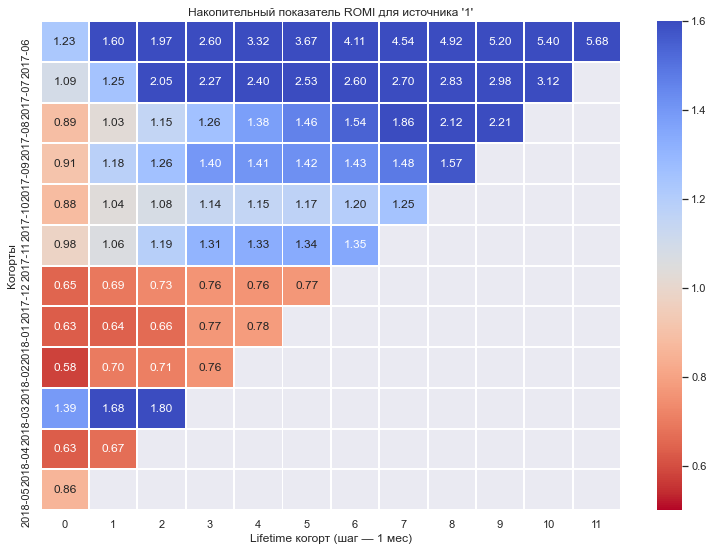

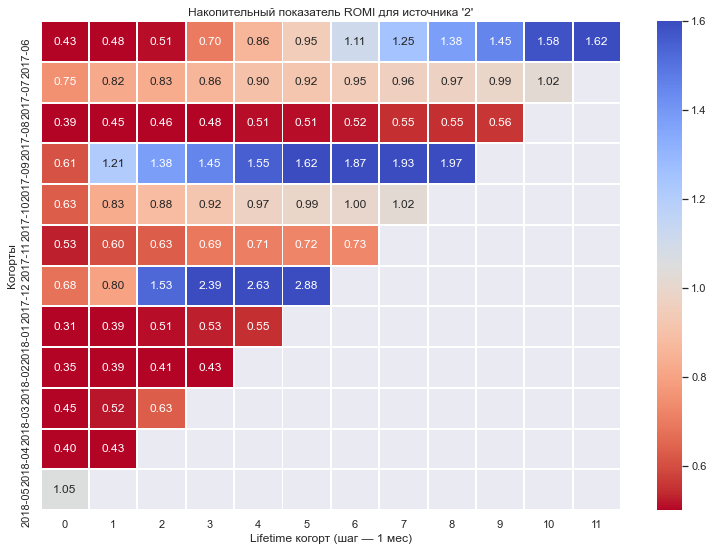

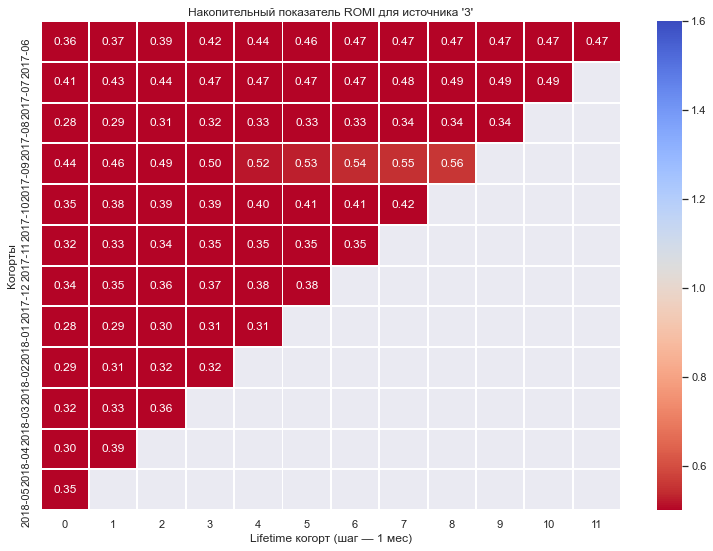

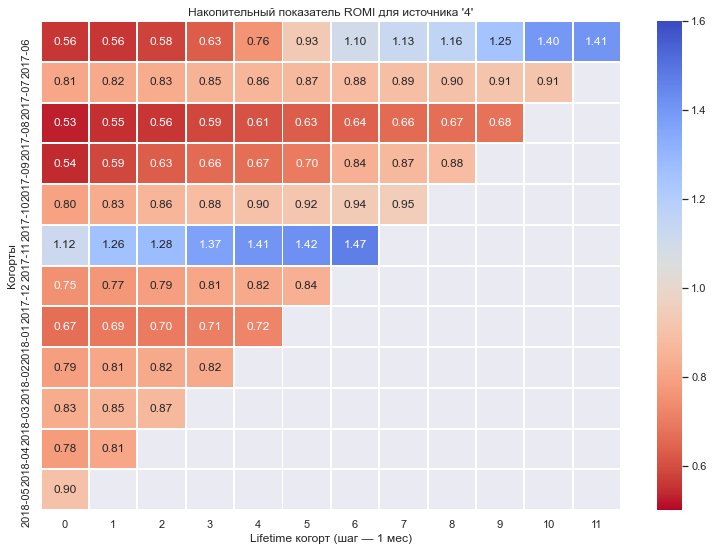

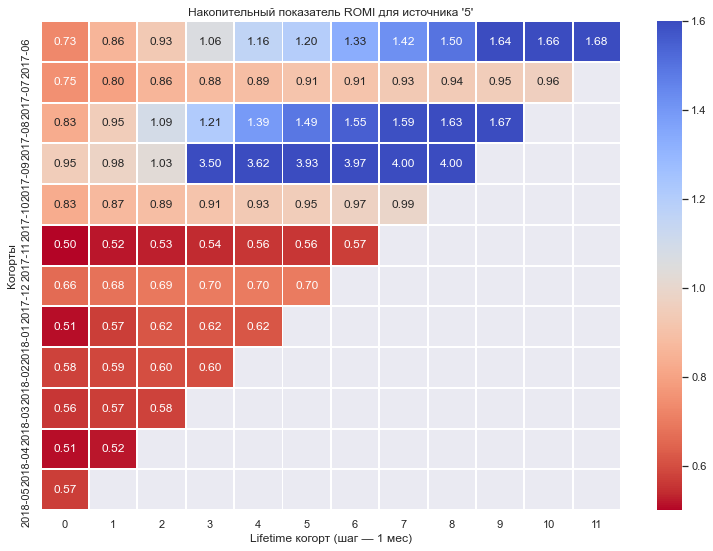

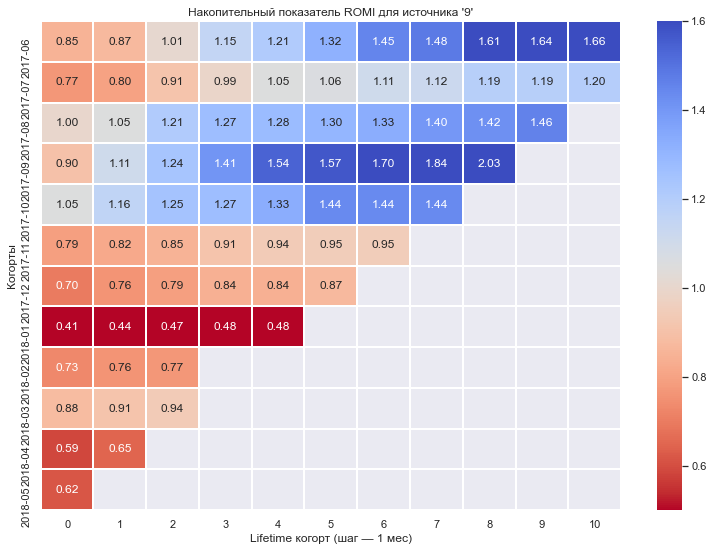

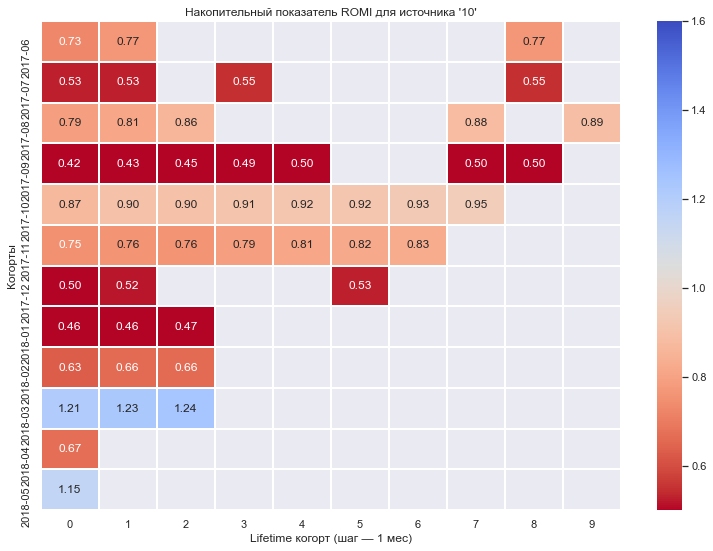

In [40]:
# рассчитаем накопительный ROMI и визуализируем результаты для каждого источника
for source in source_report_new.source_id.unique():
    table_output = (source_report_new
                     .query("source_id == @source")
                     .pivot_table(index="cohort_date", columns="age", values="romi", aggfunc="mean")
                     .cumsum(axis=1)
                     .round(2)
    )
    # визуализируем данные на тепловой карте
    plt.figure(figsize=(13, 9))
    plt.title("Накопительный показатель ROMI для источника '{}'".format(source))
    sns.heatmap(table_output, vmin=0.5, vmax=1.6, cmap="coolwarm_r", 
                annot=True, fmt=".2f", linewidths=1, linecolor="white") # момент окупаемости — переход с синюю палитру
    plt.ylabel("Когорты")
    plt.xlabel("Lifetime когорт (шаг — 1 мес)")
    plt.show

# отрегулируем размер окна вывода для удобства просмотра графиков (применить при необходимости)
#from IPython.core.display import display, HTML
#display(HTML("<style>div.output_scroll { height: 45em; }</style>"))

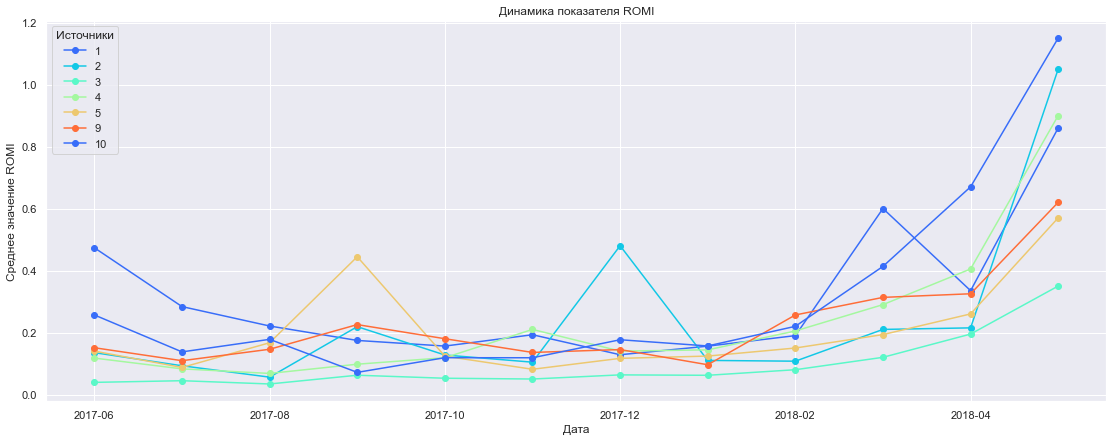

In [41]:
# визуализируем колебания показателя ROMI по источникам
source_report_new.pivot_table(index="cohort_date", columns="source_id", values="romi", aggfunc="mean").plot(style="-o")
plt.title("Динамика показателя ROMI")
plt.xlabel("Дата")
plt.ylabel("Среднее значение ROMI")
plt.legend(title="Источники")
plt.show()

### 3.6 Промежуточные выводы (метрики продаж) <a name="3.6"></a>

За весь период на маркетинг было потрачено 329132, трафик поступал из 10 разных источников, из которых на 6, 7 и 8 не тратился рекламный бюджет (один из них, логично предположить, органический поиск, второй, возможно, акции с партнерами или работа со старыми клиентами "без бюджета" ). Наибольшая часть бюджета была вложена в источник 3, а наименьшее внимание уделено источникам 9 и 10. При этом источник 10 подключали хаотично и не использовали периодами.  
  
Для оценки экономики одного покупателя подсчитали метрики LTV и CAC. Наиболее "успешные" по данным LTV принесли компании доход 11.9 за 12 месяцев (июнь 2017) и 13.4 за 9 месяцев (сентябрь 2017), остальные когорты за срок 6 месяцев приносят доход в 6-7 ед. и он растет медленно на 0.1-0.2 единицы в месяц.  
  
Сравнив показатели LTV и CAC для когорт, жизненный цикл которых не менее 6 месяцев, мы выяснили, что за полгода ни одна когорта не окупилась.  
  
Для оценки окупаемости инвестиций в маркетинг рассчитали показатель ROMI и усреднили его для всех когорт по месяцам жизни: **окупаемость наступает только через 12 месяцев.**   
  
Если рассматривать ROMI в разрезе источников трафика, то **наибольший потенциал наблюдается у источника 1, 2 и 4**. Источники 5 и 9 показывал высокую окупаемость с июня по октябрь 2017 и резко снизилась эффективность с января 2018 (учитываем, в этот период повысились бюджеты на рекламу через этот источник). Наиболее критическое состояние связано с источником 3, затраты на который максимальные, а окупаемость низкая, возможно эти затраты не окупятся и за 2 года. **В последние месяцы высокую скорость окупаемости начал показывать источник 10**, однако, там пока недостаточно данных для окончательных решений, но к нему стоит присмотреться отдельно и, возможно, запланировать несколько тестовых рекламных кампаний, чтобы отследить эффективность и потенциал более точечно.

### 3.7 Дополнительные исследования <a name="3.7"></a>

Возьмем три последних месяца и посмотрим на их основе на показатели RR (Retention Rate) для пользователей пришедших в этот период, чтобы лучше понять поведение посетителей сайта нашего сервиса.

In [42]:
# шаг 1: добавим дату, когда пользователь впервые проявил активность 
# (даты первых заходов хранятся в таблице first_visit)

users_visits = visits_data.merge(first_visit, on="uid", how="left")
users_visits = users_visits.drop(columns=["end_ts", "date", "week", "month", "year", "session_duration_sec"])

In [43]:
# шаг 2: сформируем недельные когорты
users_visits["first_visit_month"] = users_visits["first_visit"].astype("datetime64[M]")
users_visits["visit_month"] = users_visits["start_ts"].astype("datetime64[M]")

In [44]:
# шаг 3: сформируем lifetime для когорт
users_visits["cohort_lifetime"] = users_visits["visit_month"] - users_visits["first_visit_month"]
users_visits["cohort_lifetime"] = users_visits["cohort_lifetime"] / np.timedelta64(1,"M")
users_visits["cohort_lifetime"] = users_visits["cohort_lifetime"].astype("int")

users_visits["first_visit_month"] = users_visits["first_visit_month"].dt.strftime("%Y-%m-%d")

In [45]:
# шаг 4: сгруппируем данные по когорте и lifetime
cohorts_month = (users_visits
                .groupby(["first_visit_month","cohort_lifetime"])
                .agg({"uid":"nunique"})
                .reset_index()
)

In [46]:
# шаг 5: получим число пользователей, изначально бывших в когорте
initial_users_count = cohorts_month[cohorts_month["cohort_lifetime"] == 0][["first_visit_month","uid"]]
initial_users_count = initial_users_count.rename(columns={"uid":"cohort_users"})

In [47]:
# шаг 6: объединим данные по когортам с исходным количеством пользователей в когорте и рассчитаем Retention Rate
cohorts_month = cohorts_month.merge(initial_users_count, on='first_visit_month')
cohorts_month['retention'] = cohorts_month['uid'] / cohorts_month['cohort_users']

<function matplotlib.pyplot.show(*args, **kw)>

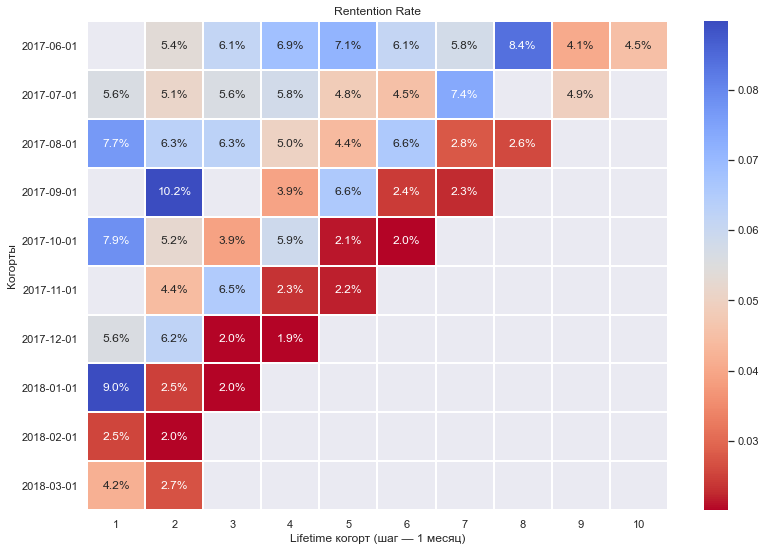

In [48]:
# шаг 7: 
retention_pivot = (cohorts_month
                   .query("cohort_lifetime > 0")
                   .pivot_table(index='first_visit_month',
                                columns='cohort_lifetime',
                                values='retention',
                                aggfunc='sum')
)

# визуализация
plt.figure(figsize=(13, 9))
plt.title("Rentention Rate")
sns.heatmap(retention_pivot, robust=True, cmap="coolwarm_r",
            annot=True, fmt=".1%", linewidths=1, linecolor="white") # момент окупаемости — переход с синюю палитру
plt.ylabel("Когорты")
plt.xlabel("Lifetime когорт (шаг — 1 месяц)")
plt.show

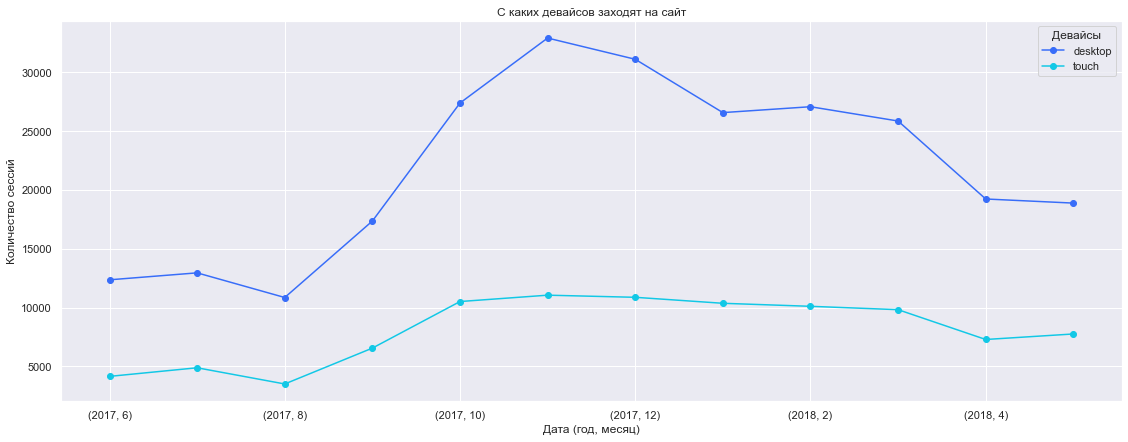

In [49]:
# узнаем какие девайсы предпочитают пользователи
device = visits_data.pivot_table(index=["year", "month"], columns="device", values="start_ts", aggfunc="count")

device.plot(style="-o")
plt.title("С каких девайсов заходят на сайт")
plt.xlabel("Дата (год, месяц)")
plt.ylabel("Количество сессий")
plt.legend(title="Девайсы")
plt.show()

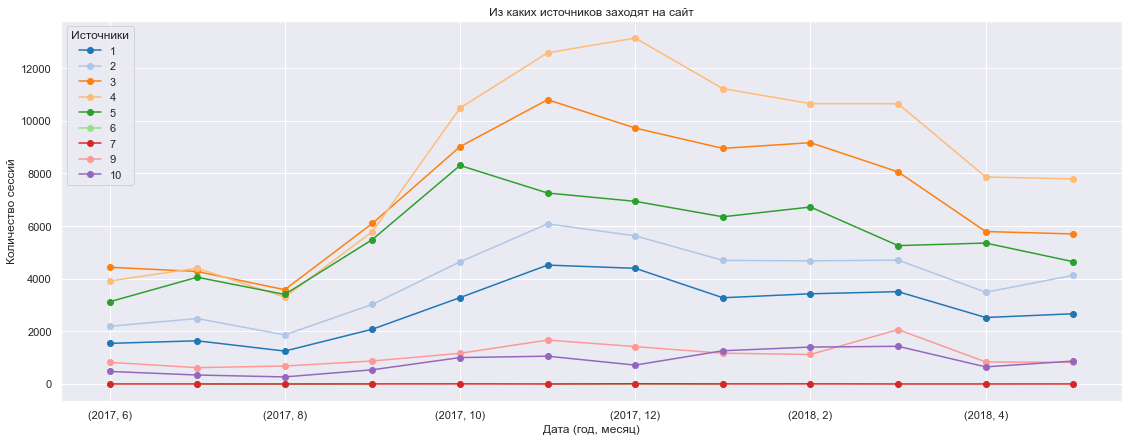

In [50]:
# узнаем из каких источников чаще приходят
source_visits = visits_data.pivot_table(index=["year", "month"], 
                                        columns="source_id", 
                                        values="start_ts", 
                                        aggfunc="count")

sns.set(rc={"figure.figsize":(19, 7)}, style="darkgrid", palette="tab20")

source_visits.plot(style="-o")

plt.title("Из каких источников заходят на сайт")
plt.xlabel("Дата (год, месяц)")
plt.ylabel("Количество сессий")
plt.legend(title="Источники")
plt.show()

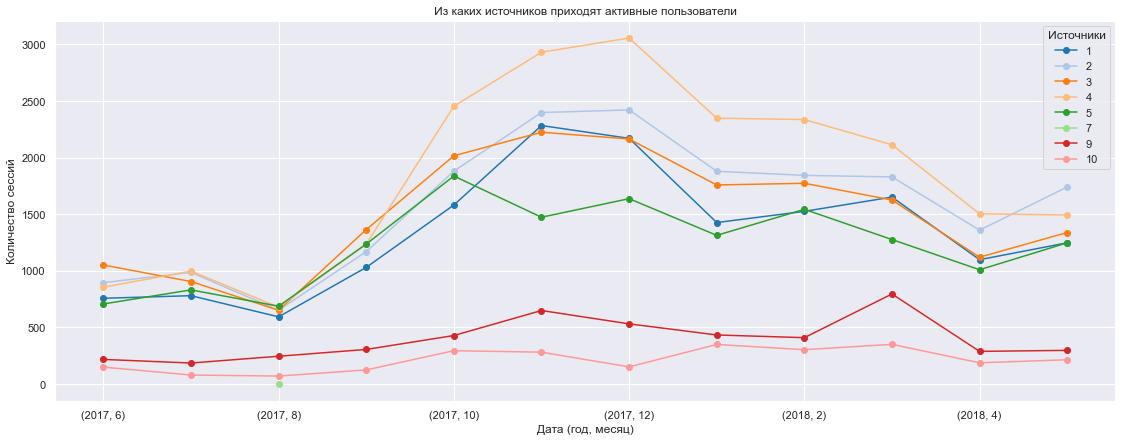

In [51]:
# узнаем из каких источников приходят пользователи, которые хотябы раз делали заказ на сайте
source_orders = (visits_data
                 .query("uid in @id_clients_list")
                 .pivot_table(index=["year", "month"], columns="source_id", values="start_ts", aggfunc="count"))

source_orders.plot(style="-o")
plt.title("Из каких источников приходят активные пользователи")
plt.xlabel("Дата (год, месяц)")
plt.ylabel("Количество сессий")
plt.legend(title="Источники")
plt.show()

Изучив показатель Rentention Rate для месячных когорт, мы обнаружили, что в первый месяц после посещения сервиса возвращаются в среднем 5-7% пользователей и не более 5-6% в среднем — в последующие месяцы. Максимальный отток пользователей происходит в первый месяц для всех когорт без исключения.   
  
Чаще всего пользователи заходят на сайт сервиса с desktop-устройств и значительно меньше пользователей — с touch-устройств. Это может говорить о том, что сервис в меньшей степени воспринимается пользователями, как "быстрый и удобный" способ решить "куда пойти" здесь и сейчас. Пользователи предпочитают взаимодействовать с сервисом в более комфортной и статичной обстановке (дома или на работе).  

Общие данные о количестве сессий, инициированных разными источниками, говорят о том, что наибольший траффик приходит из источников 4, 3, 5 и 2, а пользователи, которые сделали хотя бы один заказ (активированные), чаще приходят из источников 4, 3, 2 и 1.

# Часть 4. Выводы из исследования <a name="4"></a>

Сервис Яндекс.Афиша имеет выраженную **сезонность, которую стоит учитывать при планировании рекламных кампаний**, метрик бюджетов и KPI. Сезонность совпадает с временами года и пиковая активность приходится на осень-зиму (ноябрь-декабрь), весной наблюдается постепенный медленный спад, пик которого достигается летом.  
    
Чаще всего **пользователи приходят с конкретным запросом или по рекламе-триггеру**, чтобы изучить предложение. В среднем одна сессия доится ~1 минуты и *если новый пользователь не сделал покупку в первые часы (до 12 часов), то скорее всего он не вернется*. В среднем проходит ~16 минут между первым посещением сервиса и заказом. По данным показателя Rentention Rate — **на следующий месяц возвращается не более 5-7% пользователей.** Это может говорить о том, что маркетинговая стратегия направлена на привлечение новых пользователей и практически не вкладывает средства в удержание аудитории.  
  
Пользователи предпочитают заходить на сайт сервиса с desktop-устройств (в сравнении с touch-устройствами). Скорее всего сервис в меньшей степени воспринимается пользователями, как "быстрый и удобный" способ решить "куда пойти" здесь и сейчас. **Пользователи предпочитают взаимодействовать с сервисом в комфортной и статичной обстановке (дома или на работе).**  
  
Когортный анализ поведения пользователей и оценка среднего чека (для одного заказа и одного пользователя) выявил две максимально успешные в смысле доходности когорты *сентябрь 2017 и декабрь 2017*, а также интересное поведение покупателей в когорте за *июнь 2017* (высокий средний чек одного покупателя, лояльная аудитория). Для лучшего понимания портрета аудитории и условий, при которых эти когорты выделились по доходности, *рекомендуем дополнительно изучить данные по рекламным кампаниям этих периодов, а также мерам, предпринятым для поддержания лояльности и  интереса к сервису.*  
  
Для оценки экономики одного покупателя подсчитали метрики LTV и CAC.  Наиболее "успешные" по данным LTV принесли компании доход 11.9 за 12 месяцев (июнь 2017) и 13.4 за 9 месяцев (сентябрь 2017), остальные когорты за срок 6 месяцев приносят доход в 6-7 ед. и он растет медленно на 0.1-0.2 единицы в месяц. Сравнив показатели LTV и CAC для когорт, жизненный цикл которых не менее 6 месяцев, выяснили, что за полгода ни одна когорта не окупилась. Рассчитав накопительный показатель ROMI и усреднив его для всех когорт по месяцам жизни выявили, что **окупаемость наступает через 12 месяцев.**  
  
Из 10 рекламных источников активно использовались 1-5 и с выборочной активностью 10, источники 6-8 не поддерживались рекламным бюджетом. При изучении показателя ROMI в разрезе источников трафика, выявили, что **наибольший потенциал наблюдается у источников 1, 2 и 4, а в последние месяцы высокую скорость окупаемости начал показывать источник 10**. При этом пользователи, которые сделали хотя бы один заказ (активированные), чаще приходят из источников 4, 3, 2 и 1. При этом источник по данным показателя ROMI не окупается при максимальных затратах (самая большая доля бюджета приходится на источники 2 и 3).  
  
**На основании проведенного исследования рекомендуем обратить внимание на следующие пункты**:  
* планирование маркетинговых кампаний с учетом сезонности и предстоящих крупных событий,   
* стимулировать новых посетителей сделать заказ в ближайшие часы после первого касания – провести тестирование ретаргетинга (предложения с акцией, мероприятием, которое просматривал или подборкой похожих мероприятий),  
* обратить внимание на работу по удержанию пользователей на сайте сервиса в первую неделю, после посещения — повысить показатель RR,   
* рассмотреть варианты внедрения позиционирования сервиса, как места для быстрого и удобного поиска актуальных событий "здесь и сейчас" — привлечь аудиторию, которая активнее пользуется touch-устройствами, "на бегу" (оценить эффективность мобильной версии сайта),   
* перераспределить бюджет источника 3 на более окупаемые и эффективные источники 1, 4 и частично — 5, а также обратить внимание на потенциально прибыльный источник 10 (на данный момент недостаточно информации, рекомендуем провести сплит-тесты рекламы, чтобы найти оптимальный формат), работу с остальными активными источниками можно продолжить в намеченном режиме.  

____
**<center>[Перейти в начало исследования](#0)</center>**